<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/beauty_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.데이터 가져오기


In [56]:

import pandas as pd
total_data = pd.read_excel('./beauty_scraping.xlsx')
total_data.head(10)

,star grade,review
0,4.0,지금 두 번째 펀딩 했는데 주름이 눈에 띄게 없어졌다라기 보다 아주 조금 옅어진것 ...
1,4.0,내부사정을 자세히 알지는 못하겠고\n좋은 소식은 아닌지라\n조심스럽고 제품 신뢰도가...
2,5.0,"아침저녁 세안후 첫세럼으로 사용중입니다\n피부에 큰 트러블이 있진 않지만, 속건조?..."
3,5.0,직원분들도 너무 친절하고 좋으셨구 제품도 정말 좋습니다. 저는 문의도 많았고 직원분...
4,5.0,1차 펀딩에 이어 3차 펀딩까지 참여했는데\n사용방법에 대해 제대로 알고 사용하니 ...
5,5.0,펀딩 번호 : 6291065\n아직 케이스 리뉴얼 된건 안 왔지만 잘 사용하고 있어...
6,3.0,현재는 만족합니다..앞으로 더 사용해봐야 겠네요
7,3.0,충격적이네요 재구매는 생각 해 봐야겠어요
8,4.0,"제풒이야 소문이 나서 더 이상의 말이 필요 없지만,\n직원들 해고의 문제가 있는 것..."
9,4.5,현재 두번째 바틀 사용중인데 효과는 그닥..? 그래도 안쓰는거보다는 훨 나을듯하여 ...


In [57]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 entries, 0 to 8004
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   star grade  8005 non-null   float64
 1   review      8005 non-null   object 
dtypes: float64(1), object(1)
memory usage: 125.2+ KB


In [58]:
len(total_data)  # null 값 없음을 알수있다.


8005

In [59]:
len(total_data)  # null 값 없음을 알수있다.


8005

#2.데이터 전처리


In [60]:
x_data = total_data['review']
y_data = total_data['star grade']


#
y_data 전처리

In [61]:

def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [62]:
y_data = y_data.apply(lambda val:make_y_data(val))


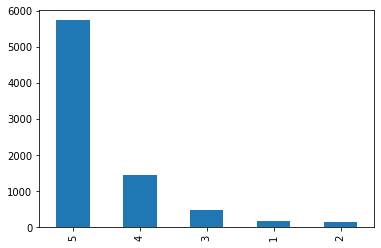

In [63]:
y_data.value_counts().plot(kind='bar')


In [64]:
y_data


0       4
1       4
2       5
3       5
4       5
       ..
8000    5
8001    5
8002    4
8003    5
8004    5
Name: star grade, Length: 8005, dtype: int64

#
Split data

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6003,), (6003,), (2002,), (2002,))

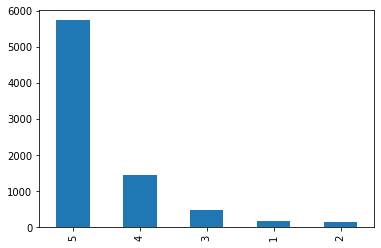

In [67]:
y_data.value_counts().plot(kind='bar')

#NPL (테스트 전처리)

In [68]:
!python -m pip install --upgrade pip

In [69]:
!python -m pip install konlpy

In [70]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  22607      0 --:--:-- --:--:-- --:--:-- 22607


In [71]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [72]:

x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

2516    으음저만은 아니군요너무 기대감이 컸던 걸까요그냥 속눈썹 찜질한다 생각하고 천천히시도...
4063    마스크를 항상 쓰고 다녀야해서 피부 트러블 자주 올라오면 고민이었는데 이 앰플 완전...
4669    지성피부인 남자인데 사용순서를 몰라서 헤매이고 귀차니즘 에 스킨만 바르는 정도인데 ...
4538    받은 뒤로 꾸준히 쓰고 있는데요굉장히 만족스럽습니다볼쪽에 오래된 모공들은 드라마틱한...
4303    깊은 속 까지 에센스가촉촉하게 피부결에 계속 머금은 듯한 느낌이 들어요 오일리하지 ...
                              ...                        
6346    벌써 번 재펀딩하고 홈페이지에서 직접 구매도 했습니다 구매자에게 더 많은 혜택을 알...
475     제품 사용하고 톤 맑아지고 트러블도 줄어서 만족해요 다만 아쉬운게 용기가 맘에 안 ...
562     요즘 링톤 계속 사용중인데 촉촉하고 진정이 되는것같아요 근데 모공에 크게 효과가 있...
266     안녕하세요 대 후반 여자 입니다평소 모공에 대해 고민이 많아서 별별 좋다는 마사지를...
5422    아니진짜 너무하는거 아니에요어쩜 이렇게 좋을수가 있나요너무너무좋아요ㅠ정말 촉촉하니 ...
Name: review, Length: 6003, dtype: object

In [73]:
from konlpy.tag import Mecab


In [74]:
mecab = Mecab()


In [75]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [76]:
import pickle

In [77]:
pickle.dump(stopwords, open('./stopwords.pkl','wb'))


In [78]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['으음',
  '.',
  '.',
  '저',
  '만',
  '군요',
  '.',
  '.^^;',
  '너무',
  '기대감',
  '컸',
  '던',
  '걸까요',
  '.',
  '.',
  '그냥',
  '속눈썹',
  '찜질',
  '한다',
  '고',
  '천천히',
  '시도',
  '해',
  '볼께요',
  '^^',
  '영양제',
  '너무',
  '으니',
  '효과',
  '길',
  '바래',
  '봅니다',
  '^^'],
 ['마스크',
  '항상',
  '쓰',
  '고',
  '다녀야',
  '해서',
  '피부',
  '트러블',
  '자주',
  '올라오',
  '면',
  '고민',
  '었',
  '는데',
  '앰',
  '플',
  '완전',
  '촉촉',
  '면서',
  '진',
  '네요',
  '.',
  '유기농',
  '병풀',
  '성분',
  '을',
  '함유',
  '고',
  '어서',
  '예민',
  '해진',
  '피부',
  '최고',
  '진정',
  '앰',
  '플',
  '인',
  '아요',
  '.',
  '앰',
  '플',
  '보다',
  '순하',
  '면서',
  '호불호',
  '무',
  '향',
  '타입',
  '라서',
  '마음',
  '드',
  '네요',
  '.',
  '유해',
  '성분',
  ',',
  '재',
  '활용',
  '용기',
  '담',
  '아',
  '환경',
  '을',
  '보호',
  ',',
  '양',
  '넉넉',
  '해서',
  '성비',
  ',',
  '모두',
  '만족',
  '입니다',
  '.'],
 ['지성',
  '피부',
  '인',
  '남자',
  '인데',
  ',',
  '사용',
  '순서',
  '몰라서',
  '헤매이',
  '고',
  '귀차',
  '니즘',
  '스킨',
  '만',
  '바르',
  '인데',
  '사용',
  '방법',
  '을',
  '자세히',
 

##Tokenizer

In [79]:
import tensorflow as tf


In [80]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()


In [81]:
tokenizer.fit_on_texts(sentence)


In [82]:
tokenizer.word_index


{'.': 1,
 '고': 2,
 '도': 3,
 '을': 4,
 '!': 5,
 '어요': 6,
 '게': 7,
 '는데': 8,
 '사용': 9,
 '피부': 10,
 ',': 11,
 '습니다': 12,
 '했': 13,
 '네요': 14,
 '제품': 15,
 '아요': 16,
 '해': 17,
 '펀딩': 18,
 '면': 19,
 '너무': 20,
 '쓰': 21,
 '어': 22,
 '었': 23,
 '다': 24,
 '아': 25,
 '로': 26,
 '거': 27,
 '느낌': 28,
 '만': 29,
 '겠': 30,
 '기': 31,
 '았': 32,
 '바르': 33,
 '지만': 34,
 '저': 35,
 '효과': 36,
 '~': 37,
 '라': 38,
 '해서': 39,
 '니': 40,
 '써': 41,
 '합니다': 42,
 '촉촉': 43,
 '입니다': 44,
 '할': 45,
 '만족': 46,
 '어서': 47,
 '모공': 48,
 '정말': 49,
 '?': 50,
 '제': 51,
 '많이': 52,
 '서': 53,
 '구매': 54,
 '아서': 55,
 '던': 56,
 '얼굴': 57,
 '향': 58,
 '요': 59,
 '..': 60,
 '까지': 61,
 '플': 62,
 '앰': 63,
 '봤': 64,
 '면서': 65,
 '인': 66,
 '진짜': 67,
 '후': 68,
 '에서': 69,
 '건조': 70,
 'ㅎㅎ': 71,
 ')': 72,
 '화장품': 73,
 '보다': 74,
 '해요': 75,
 '시': 76,
 '처음': 77,
 '세': 78,
 ':': 79,
 '인데': 80,
 '1': 81,
 '당고': 82,
 '꾸준히': 83,
 '세안': 84,
 '에요': 85,
 '더라구요': 86,
 '기대': 87,
 '크림': 88,
 '트러블': 89,
 '흡수': 90,
 '성': 91,
 '2': 92,
 '3': 93,
 '분': 94,
 '^^': 95,
 '건

In [83]:
tokenizer.word_counts


OrderedDict([('으음', 1),
             ('.', 16484),
             ('저', 1734),
             ('만', 2035),
             ('군요', 16),
             ('.^^;', 3),
             ('너무', 2666),
             ('기대감', 38),
             ('컸', 29),
             ('던', 1213),
             ('걸까요', 20),
             ('그냥', 453),
             ('속눈썹', 84),
             ('찜질', 2),
             ('한다', 20),
             ('고', 14692),
             ('천천히', 10),
             ('시도', 21),
             ('해', 2892),
             ('볼께요', 32),
             ('^^', 660),
             ('영양제', 25),
             ('으니', 140),
             ('효과', 1697),
             ('길', 319),
             ('바래', 19),
             ('봅니다', 121),
             ('마스크', 643),
             ('항상', 181),
             ('쓰', 2600),
             ('다녀야', 8),
             ('해서', 1643),
             ('피부', 4674),
             ('트러블', 697),
             ('자주', 116),
             ('올라오', 187),
             ('면', 2688),
             ('고민', 393),
             (

In [84]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value  # 2 미만의 수

In [85]:
total_cnt, rare_cnt, rare_cnt/total_cnt, rare_freq/total_freq


(13971, 8042, 0.5756209290673538, 0.024006121391454267)

In [86]:
vocab_size = total_cnt - rare_cnt


In [87]:
vocab_size


5929

In [88]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')


In [89]:
tokenizer.fit_on_texts(sentence)


In [90]:
tokenizer.index_word


{1: 'OOV',
 2: '.',
 3: '고',
 4: '도',
 5: '을',
 6: '!',
 7: '어요',
 8: '게',
 9: '는데',
 10: '사용',
 11: '피부',
 12: ',',
 13: '습니다',
 14: '했',
 15: '네요',
 16: '제품',
 17: '아요',
 18: '해',
 19: '펀딩',
 20: '면',
 21: '너무',
 22: '쓰',
 23: '어',
 24: '었',
 25: '다',
 26: '아',
 27: '로',
 28: '거',
 29: '느낌',
 30: '만',
 31: '겠',
 32: '기',
 33: '았',
 34: '바르',
 35: '지만',
 36: '저',
 37: '효과',
 38: '~',
 39: '라',
 40: '해서',
 41: '니',
 42: '써',
 43: '합니다',
 44: '촉촉',
 45: '입니다',
 46: '할',
 47: '만족',
 48: '어서',
 49: '모공',
 50: '정말',
 51: '?',
 52: '제',
 53: '많이',
 54: '서',
 55: '구매',
 56: '아서',
 57: '던',
 58: '얼굴',
 59: '향',
 60: '요',
 61: '..',
 62: '까지',
 63: '플',
 64: '앰',
 65: '봤',
 66: '면서',
 67: '인',
 68: '진짜',
 69: '후',
 70: '에서',
 71: '건조',
 72: 'ㅎㅎ',
 73: ')',
 74: '화장품',
 75: '보다',
 76: '해요',
 77: '시',
 78: '처음',
 79: '세',
 80: ':',
 81: '인데',
 82: '1',
 83: '당고',
 84: '꾸준히',
 85: '세안',
 86: '에요',
 87: '더라구요',
 88: '기대',
 89: '크림',
 90: '트러블',
 91: '흡수',
 92: '성',
 93: '2',
 94: '3',
 95: '분',
 9

In [55]:
pickle.dump(tokenizer, open('./tokenizer_beauty.pkl','wb'))


#x_train 숫자화

In [91]:
x_train = tokenizer.texts_to_sequences(sentence)


In [92]:
print(x_train[0:3])


[[1, 2, 2, 36, 30, 2113, 2, 4890, 21, 1185, 1404, 57, 1827, 2, 2, 147, 669, 1, 1828, 3, 2713, 1771, 18, 1312, 96, 1559, 21, 438, 37, 221, 1892, 490, 96], [101, 353, 22, 3, 3056, 40, 11, 90, 513, 339, 20, 167, 24, 9, 64, 63, 233, 44, 66, 138, 15, 2, 522, 327, 106, 5, 1509, 3, 48, 157, 391, 11, 299, 199, 64, 63, 67, 17, 2, 64, 63, 75, 318, 66, 1772, 454, 59, 356, 283, 146, 290, 15, 2, 2881, 106, 12, 177, 951, 266, 631, 26, 611, 5, 2114, 12, 340, 1347, 40, 2027, 12, 441, 47, 45, 2], [442, 11, 67, 534, 81, 12, 10, 2115, 1607, 1, 3, 2474, 2593, 241, 30, 34, 81, 10, 596, 5, 1434, 1000, 792, 2115, 427, 10, 41, 186, 392, 23, 28, 56, 13, 2]]


In [93]:
hist_len = [len(words) for words in x_train]


(array([2.457e+03, 1.570e+03, 7.500e+02, 3.990e+02, 2.470e+02, 1.430e+02,
        1.240e+02, 7.100e+01, 4.300e+01, 4.000e+01, 3.400e+01, 1.900e+01,
        2.000e+01, 1.200e+01, 8.000e+00, 5.000e+00, 6.000e+00, 5.000e+00,
        1.200e+01, 7.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 5.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000e+00, 3.18600e+01, 6.27200e+01, 9.35800e+01, 1.24440e+02,
        1.55300e+02, 1.86160e+02, 2.17020e+02, 2.47880e+02, 2.78740e+02,
        3.09600e+02, 3.40460e+02, 3.71320e+02, 4.02180e+02, 4.33040e+02,
        4.63900e+02, 4.94760e+02, 5.25620e+02, 5.56480e+02, 5.87340e+02,
        6.18200e+02, 6.49060e+02, 6.79920e+02, 7.10780e+02, 7.41640e+02,
        7.7

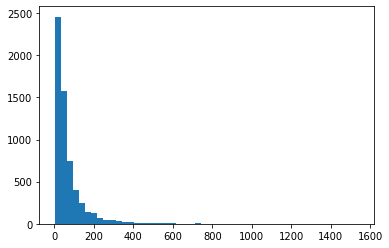

In [94]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

###padding

In [95]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)


In [96]:
x_train


array([[   0,    0,    0, ..., 1892,  490,   96],
       [   0,    0,    0, ...,   47,   45,    2],
       [   0,    0,    0, ...,   56,   13,    2],
       ...,
       [   0,    0,    0, ...,   48,  506,    1],
       [ 407,  123,    3, ...,    1, 2440,    1],
       [   0,    0,    0, ...,  407,   17,   96]], dtype=int32)

In [97]:
import numpy as np
y_train = np.array(y_train)-1
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [98]:
len(x_train),len(y_train)


(6003, 6003)

#3. Make model

In [99]:
model = tf.keras.models.Sequential()


In [100]:

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=200))  # input layer

# model.add(tf.keras.layers.LSTM(128))  # hidden layer
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))  # hidden layer
# model.add(tf.keras.layers.GRU(32, return_sequences=True))  # hidden layer
model.add(tf.keras.layers.GRU(128, return_sequences=True))  # hidden layer
model.add(tf.keras.layers.GRU(64))  # hidden layer

model.add(tf.keras.layers.Dense(5, activation='softmax'))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])  # gadget

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 30)           177870    
_________________________________________________________________
gru_2 (GRU)                  (None, 200, 128)          61440     
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 276,883
Trainable params: 276,883
Non-trainable params: 0
_________________________________________________________________


In [50]:
hist = model.fit(x_train, y_train, epochs=500, batch_size=256, validation_split=0.3, shuffle=True)


Epoch 1/500
17/17 [==============================] - 31s 2s/step - loss: 1.2569 - acc: 0.6844 - val_loss: 0.8988 - val_acc: 0.7118
Epoch 2/500
17/17 [==============================] - 26s 2s/step - loss: 0.8752 - acc: 0.7158 - val_loss: 0.8536 - val_acc: 0.7118
Epoch 3/500
17/17 [==============================] - 26s 2s/step - loss: 0.8120 - acc: 0.7158 - val_loss: 0.7885 - val_acc: 0.7118
Epoch 4/500
17/17 [==============================] - 26s 2s/step - loss: 0.7094 - acc: 0.7201 - val_loss: 0.7273 - val_acc: 0.7207
Epoch 5/500
17/17 [==============================] - 26s 2s/step - loss: 0.6090 - acc: 0.7485 - val_loss: 0.6985 - val_acc: 0.7329
Epoch 6/500
17/17 [==============================] - 25s 1s/step - loss: 0.5257 - acc: 0.7984 - val_loss: 0.7242 - val_acc: 0.7235
Epoch 7/500
17/17 [==============================] - 25s 1s/step - loss: 0.4612 - acc: 0.8215 - val_loss: 0.8012 - val_acc: 0.7229
Epoch 8/500
17/17 [==============================] - 25s 1s/step - loss: 0.4033 - a

In [51]:

model.evaluate(x_train, y_train)

188/188 [==============================] - 14s 72ms/step - loss: 0.9767 - acc: 0.9060


[0.9766718745231628, 0.906046986579895]

In [52]:

model.save('./DL_beauty.h5')

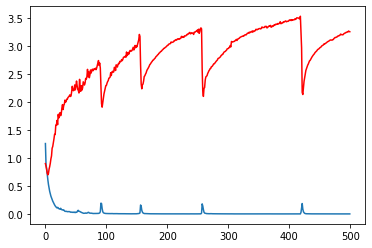

In [53]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'-r')
plt.show()

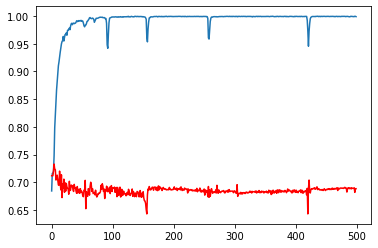

In [54]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'-r')
plt.show()